# Relaxation Problem for Branch Cut


Given integer $N$ and array $X$ of length $2^N$.

By multiplying $1,1j,-1$ or $-1j$ to each value, we can get $2^N$ complex values.

Maximize the absolute value of the sum of these $2^N$ complex values.


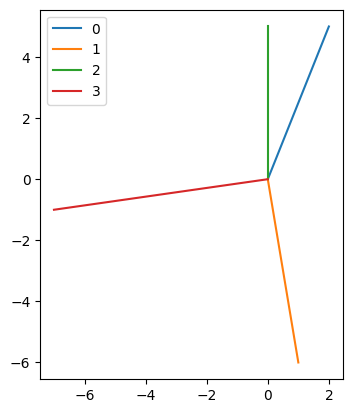

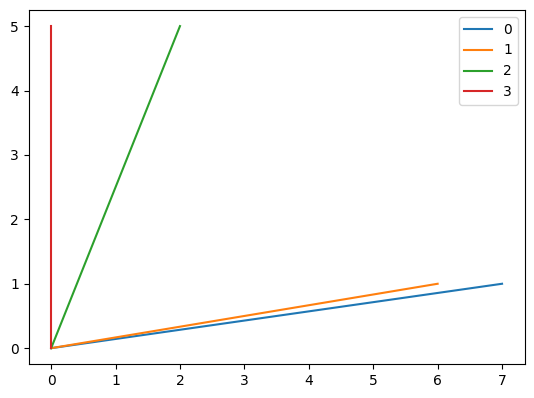

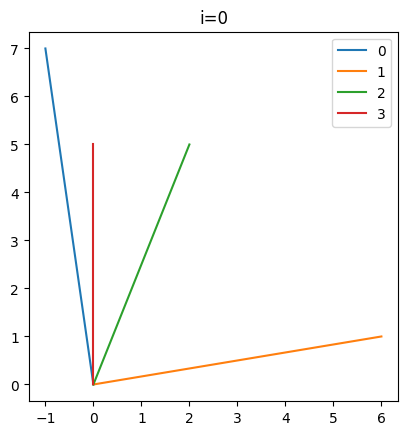

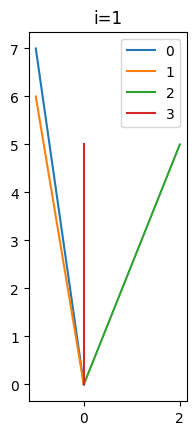

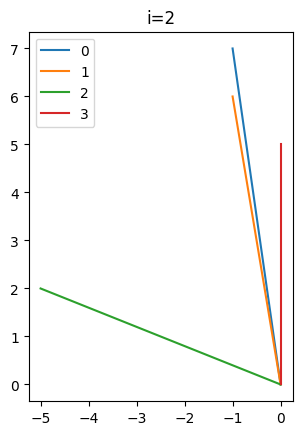

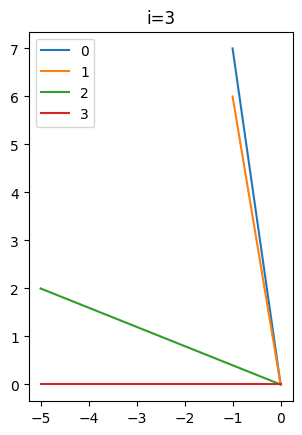

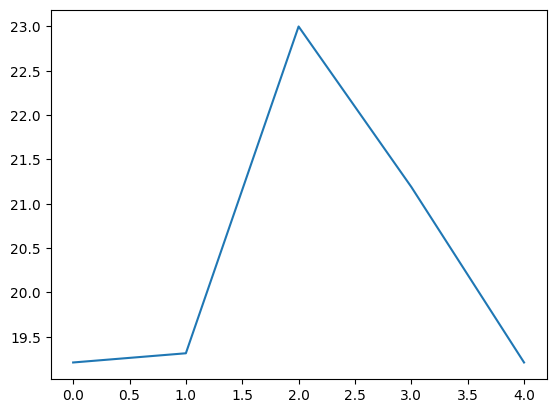

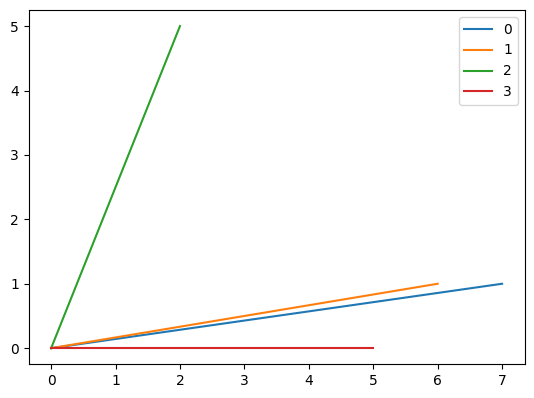

ansSlow=23.0, ansF1=23.000, ansF2=21.190, ansF0=23.539
n=1, seed=0, ansSlow=1.557, ansF1=1.557, ansF2=1.557, ansF0=1.617
n=1, seed=1, ansSlow=0.656, ansF1=0.656, ansF2=0.656, ansF0=0.662
n=1, seed=2, ansSlow=1.094, ansF1=1.094, ansF2=1.094, ansF0=1.096
n=2, seed=0, ansSlow=3.482, ansF1=3.482, ansF2=3.482, ansF0=3.513
n=2, seed=1, ansSlow=2.892, ansF1=2.892, ansF2=2.892, ansF0=2.990
n=2, seed=2, ansSlow=2.879, ansF1=2.879, ansF2=2.879, ansF0=3.110
n=3, seed=0, ansSlow=5.627, ansF1=5.627, ansF2=5.627, ansF0=5.981
n=3, seed=1, ansSlow=5.569, ansF1=5.569, ansF2=5.569, ansF0=6.093
n=3, seed=2, ansSlow=4.295, ansF1=4.295, ansF2=4.135, ansF0=4.545


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product


def vis(N: int, Xs: list, title=""):
    for i in range(1 << N):
        plt.plot([0, Xs[i].real], [0, Xs[i].imag], label=f"{i}")
    plt.gca().set_aspect("equal", adjustable="box")
    if N <= 3:
        plt.legend()
    plt.title(title)
    plt.show()


def solveSlow(N: int, Xs: list, do_vis):
    assert len(Xs) == 1 << N
    if do_vis:
        vis(N, Xs)
    maxAbs = 0
    for phases in product(range(4), repeat=1 << n):
        x = 0.0 + 0.0j
        for i in range(1 << n):
            if phases[i] == 0:
                x += Xs[i]
            elif phases[i] == 1:
                x += Xs[i] * 1j
            elif phases[i] == 2:
                x += -Xs[i]
            elif phases[i] == 3:
                x += -Xs[i] * 1j
        absVal = abs(x)
        if maxAbs < absVal:
            maxAbs = absVal
    return maxAbs


def ansFast0(N: int, Xs: list):
    return sum(abs(X) for X in Xs)


def rotate(x):
    if x.imag >= 0:
        if x.real >= 0:
            return x
        else:
            return x * -1j
    else:
        if x.real <= 0:
            return -x
        else:
            return x * 1j


def ansFast1(N: int, Xs: list, do_vis):
    Ys = [rotate(X) for X in Xs]
    Ys.sort(key=lambda Y: (Y.imag / Y.real) if Y.real != 0 else 1e9)
    sumYsReal = sum(Y.real for Y in Ys)
    sumYsImag = sum(Y.imag for Y in Ys)
    maxAbs2 = sumYsReal**2 + sumYsImag**2
    absVals = [maxAbs2**0.5]
    for i in range(1 << N):
        sumYsReal += -Ys[i].real - Ys[i].imag
        sumYsImag += -Ys[i].imag + Ys[i].real
        absVal2 = sumYsReal**2 + sumYsImag**2
        absVals.append(absVal2**0.5)
        maxAbs2 = max(maxAbs2, absVal2)
        Ys[i] *= 1j
        if do_vis:
            vis(N, Ys, f"{i=}")
    if do_vis:
        plt.plot(absVals)
        plt.show()
    return maxAbs2**0.5


def ansFast2(N: int, Xs: list, do_vis):
    Ys = [rotate(X) for X in Xs]
    Ys.sort(key=lambda Y: (Y.imag / Y.real) if Y.real != 0 else 1e9)
    sumYsReal = sum(Y.real for Y in Ys)
    sumYsImag = sum(Y.imag for Y in Ys)
    sumY = sumYsReal + 1j * sumYsImag
    _Ys = []
    for y in Ys:
        v1 = sumY.conjugate() * (y * (1))
        v2 = sumY.conjugate() * (y * (1j))
        v3 = sumY.conjugate() * (y * (-1))
        v4 = sumY.conjugate() * (y * (-1j))
        maxI = np.argmax([v1, v2, v3, v4])
        _Ys.append(y * (1j**maxI))
    Ys = _Ys
    if do_vis:
        vis(N, Ys)
    sumYsReal = sum(Y.real for Y in Ys)
    sumYsImag = sum(Y.imag for Y in Ys)
    maxAbs2 = sumYsReal**2 + sumYsImag**2
    return maxAbs2**0.5


n = 2
Xs = [2 + 5j, 1 - 6j, 0 + 5j, -7 - 1j]
ansSlow = solveSlow(n, Xs, True)
ansF1 = ansFast1(n, Xs, True)
ansF2 = ansFast2(n, Xs, True)
ansF0 = ansFast0(n, Xs)
print(f"{ansSlow=}, {ansF1=:.3f}, {ansF2=:.3f}, {ansF0=:.3f}")

for n in [1, 2, 3]:
    for seed in range(3):
        Xs = np.random.rand(1 << n) + 1j * np.random.rand(1 << n)
        ansSlow = solveSlow(n, Xs, False)
        ansF1 = ansFast1(n, Xs, False)
        ansF2 = ansFast2(n, Xs, False)
        ansF0 = ansFast0(n, Xs)
        print(
            f"n={n}, seed={seed}, {ansSlow=:.3f}, {ansF1=:.3f}, {ansF2=:.3f}, {ansF0=:.3f}"
        )
        assert np.isclose(ansSlow, ansF1)
        # if not np.isclose(ansSlow, ansF2):
        #     ansFast2(n, Xs, True)
        #     assert False

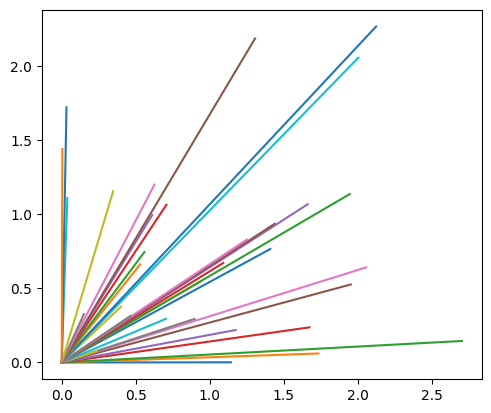

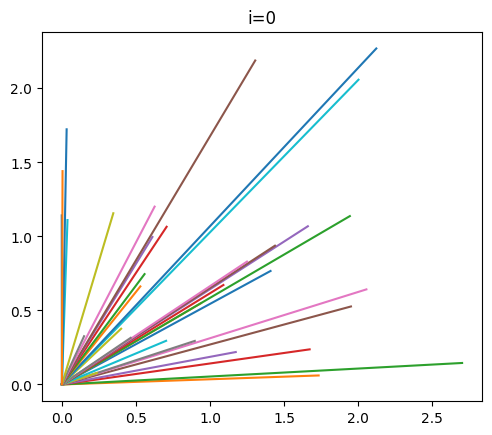

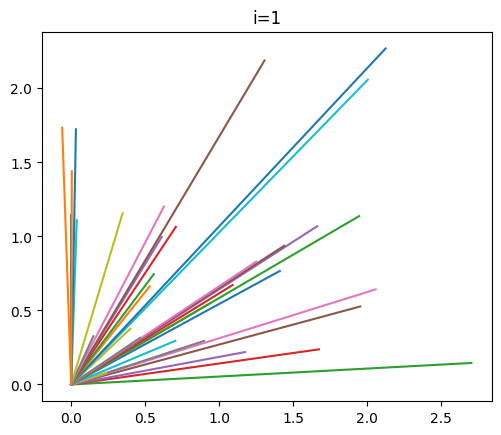

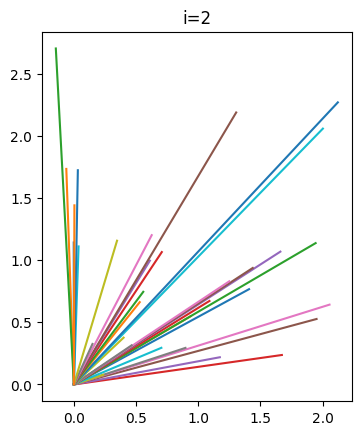

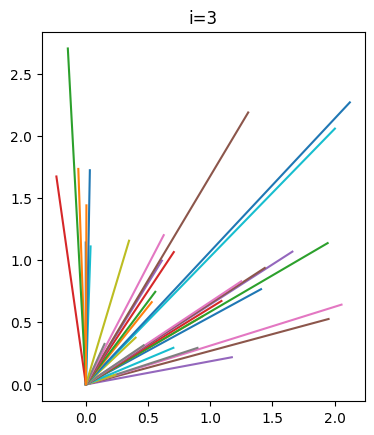

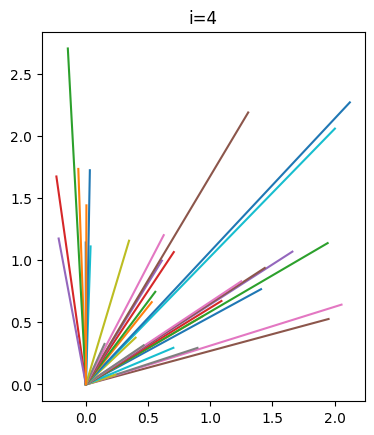

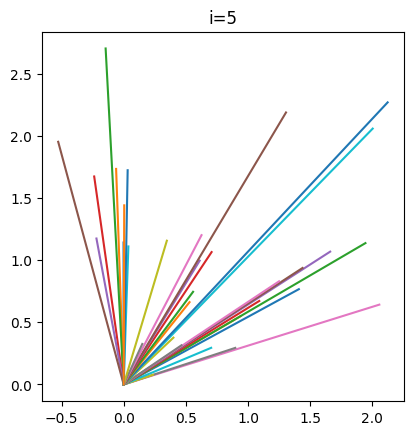

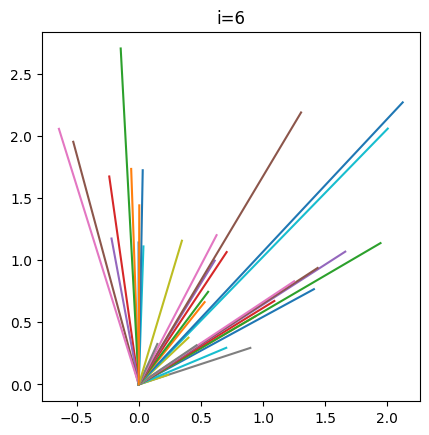

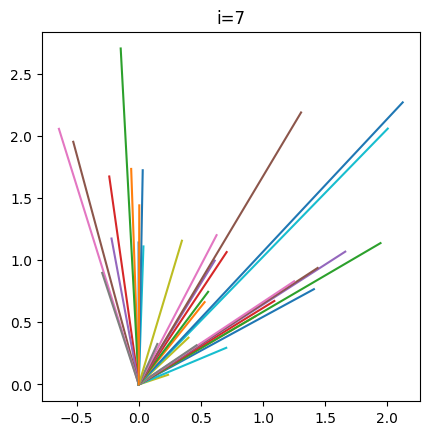

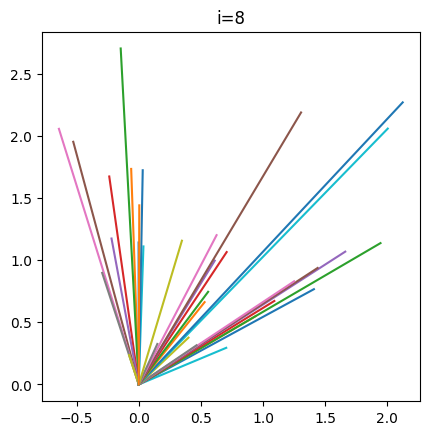

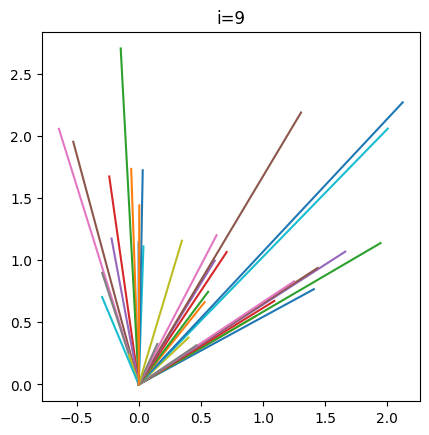

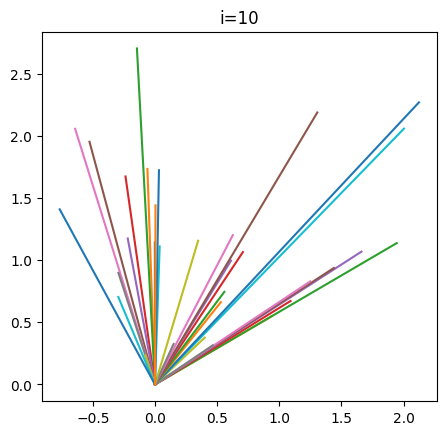

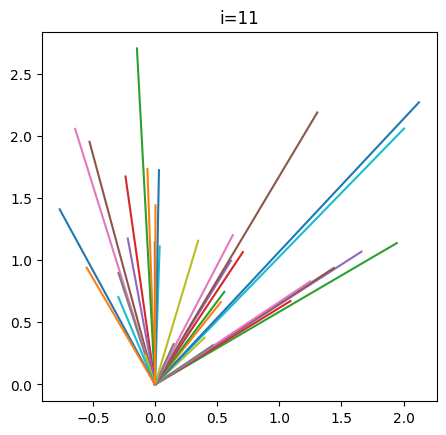

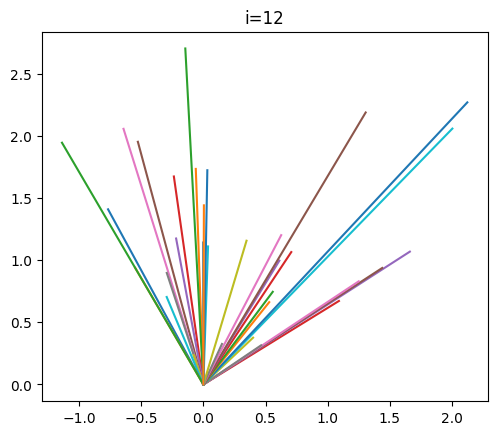

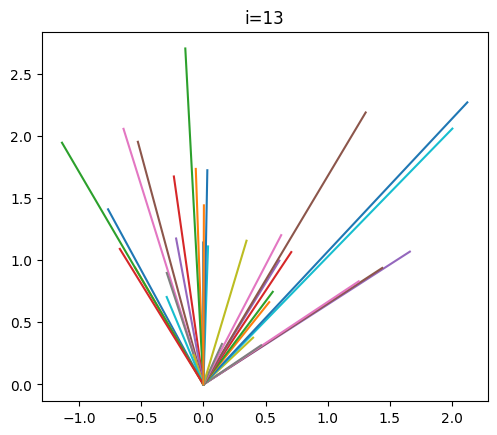

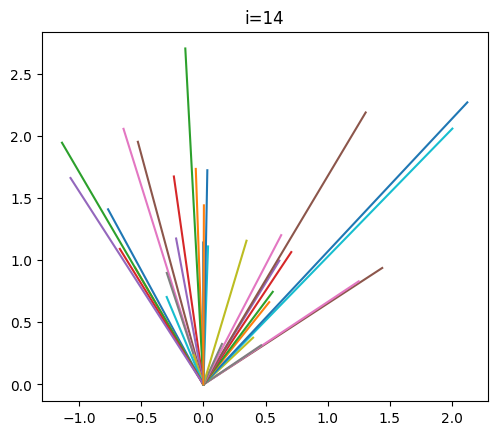

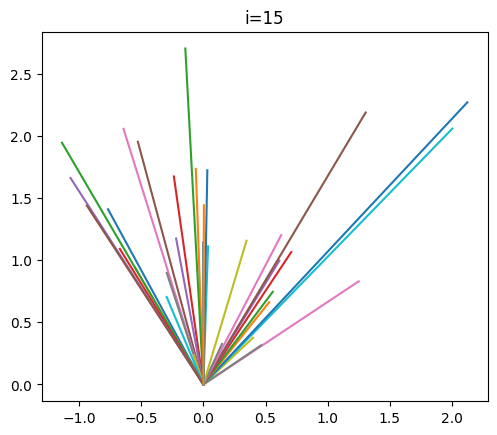

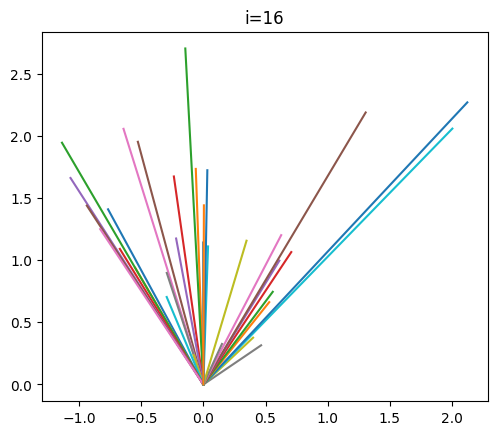

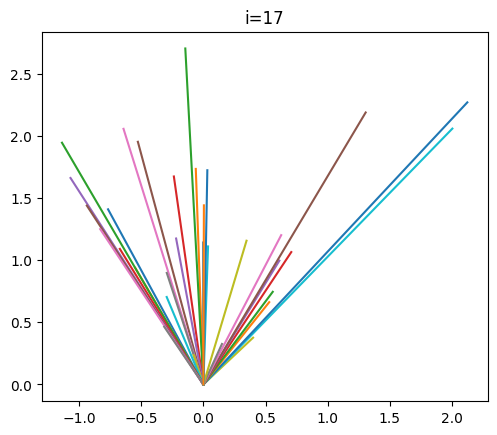

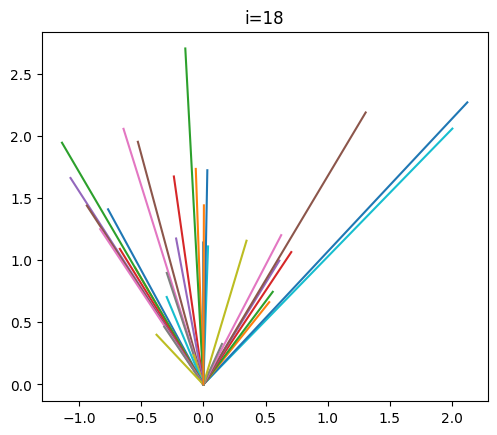

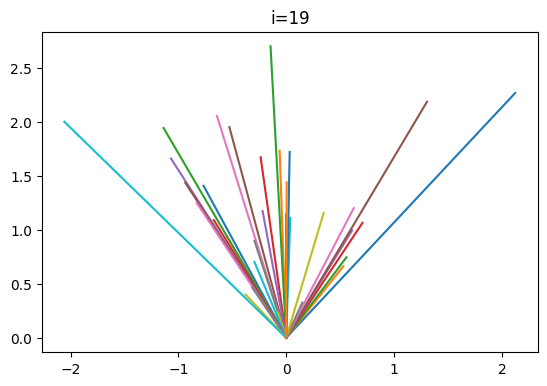

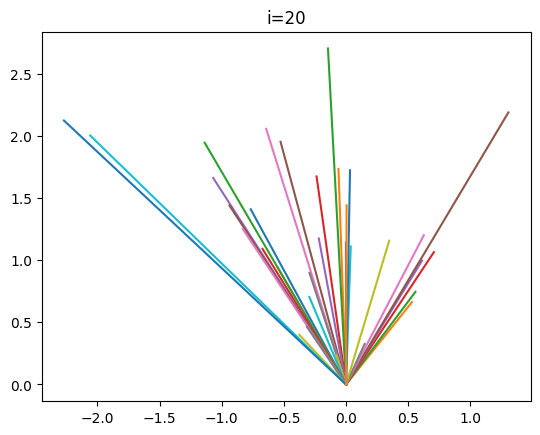

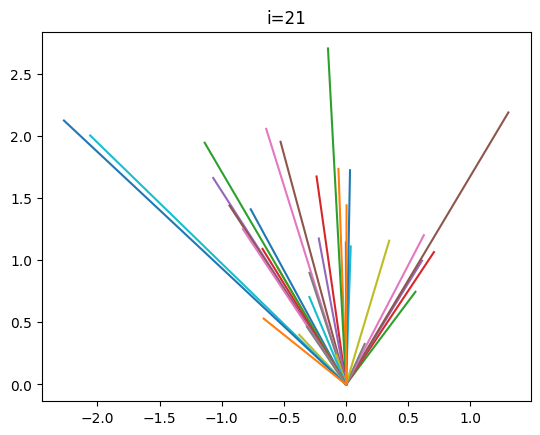

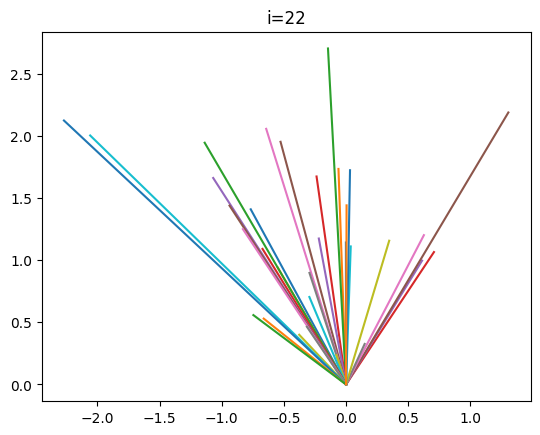

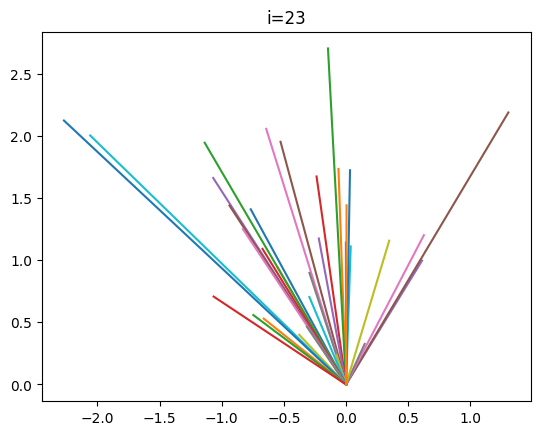

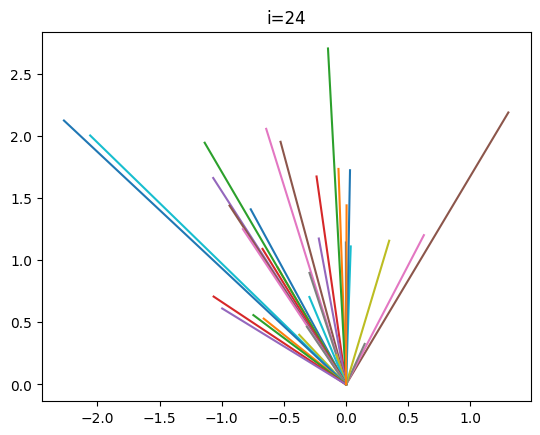

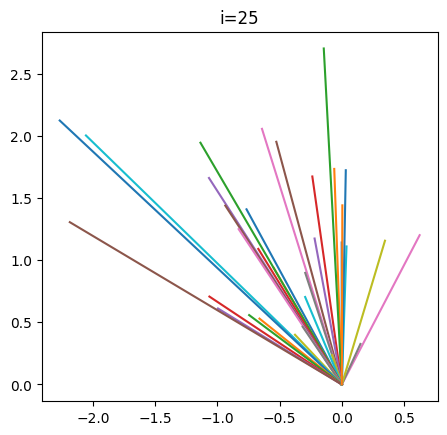

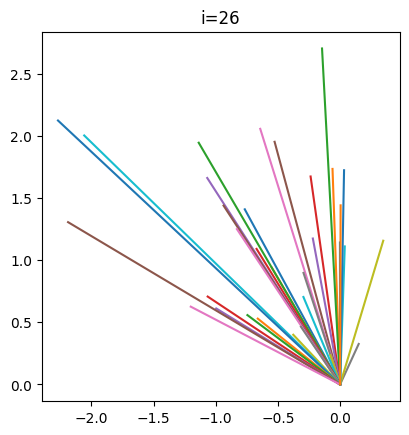

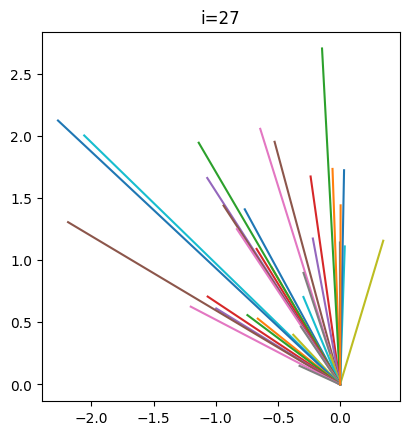

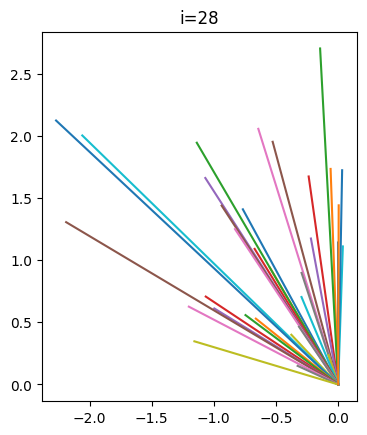

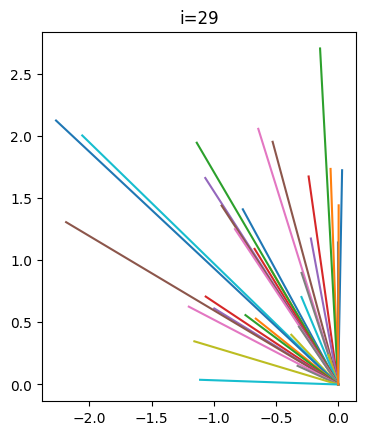

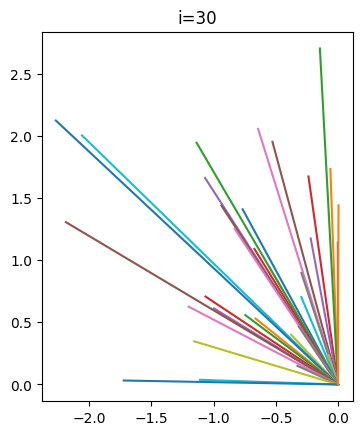

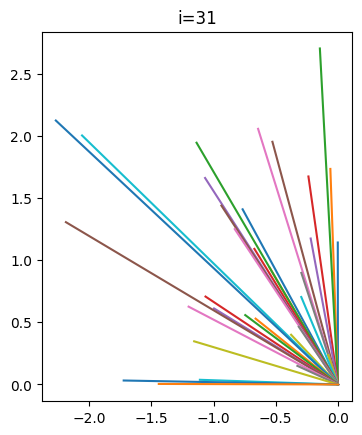

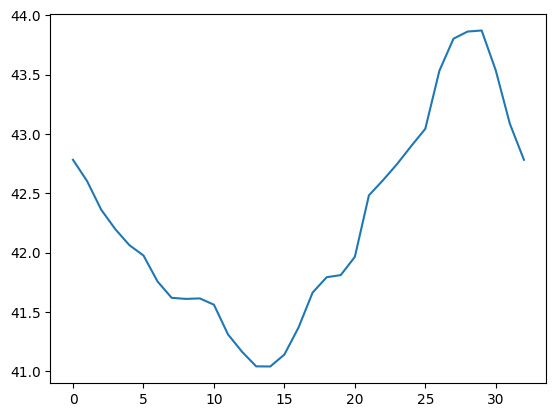

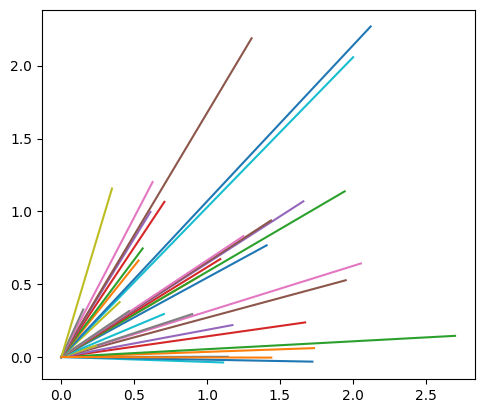

n=5, seed=0, ansF0=47.078, ansF1=43.872, ansF2=43.872, t1-t0=19.96748 t2-t1=0.00008


In [5]:
import time

for n in [5]:
    for seed in range(1):
        Xs = np.random.normal(size=1 << n) + 1j * np.random.normal(size=1 << n)
        t0 = time.perf_counter()
        ansF1 = ansFast1(n, Xs, True)
        t1 = time.perf_counter()
        ansF0 = ansFast0(n, Xs)
        t2 = time.perf_counter()
        ansF2 = ansFast2(n, Xs, True)
        print(
            f"n={n}, seed={seed}, {ansF0=:.3f}, {ansF1=:.3f}, {ansF2=:.3f}, {t1-t0=:.5f} {t2-t1=:.5f}"
        )